In [55]:
### Loading the Titanic dataset
# This script loads the Titanic dataset from CSV files into pandas dataframes.

import pandas as pd

# Load the training and testing data into dataframes
train_data = pd.read_csv('titanic_data/train.csv')
train_df = pd.DataFrame(train_data)

test_data = pd.read_csv('titanic_data/test.csv')
test_df = pd.DataFrame(test_data)

y_data = pd.read_csv('titanic_data/gender_submission.csv')
y_df = pd.DataFrame(y_data)

# Merge the testing data into one dataframe
test_df = pd.merge(test_df, y_df, on='PassengerId', how='left')

In [56]:
### Overview of Data before cleaning

# Check the info of the columns
print(train_df.info())
print()
print(test_df.info())
print()

# Check the unique values of the columns
for column in train_df.columns:
    print(f"{column}: {len(train_df[column].unique())} unique values")
print()
for column in test_df.columns:
    print(f"{column}: {len(test_df[column].unique())} unique values")
print()

#Check if there are any missing values in the data
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())
print()

# Checking out the Age column to fill in for missing values
print(train_df['Age'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [57]:
### Data claning and preprocessing

# Change datatype of columns for EDA
train_df['Sex'] = train_df['Sex'].map({'male':1, 'female':0})
test_df['Sex'] = test_df['Sex'].map({'male':1, 'female':0})

# Dropping columns that are not needed for the analysis (before EDA)
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1, inplace=True)

# Filling in the missing values in the Age column and Fare column with the mean of the column
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

print(train_df.info())
print()
print(test_df.info())
print(train_df.shape)
print(test_df.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Survived  418 non-null    int64  
dtypes: float64(2), int64(5)
memo

/var/folders/gn/8692wbbn2jqbdbljkddblglm0000gn/T/ipykernel_75910/7069712.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
/var/folders/gn/8692wbbn2jqbdbljkddblglm0000gn/T/ipykernel_75910/7069712.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

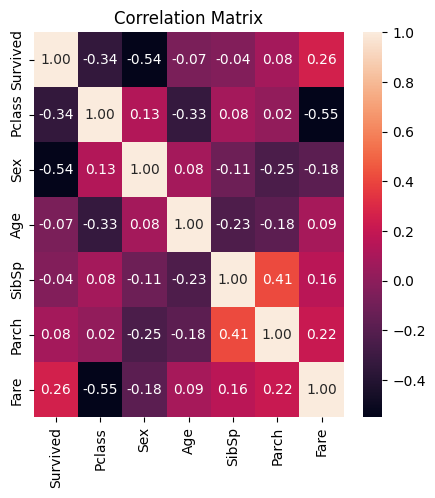

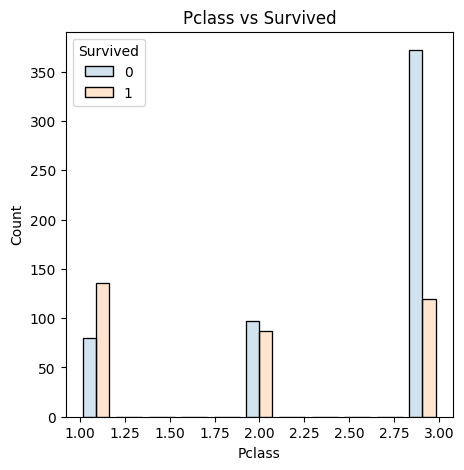

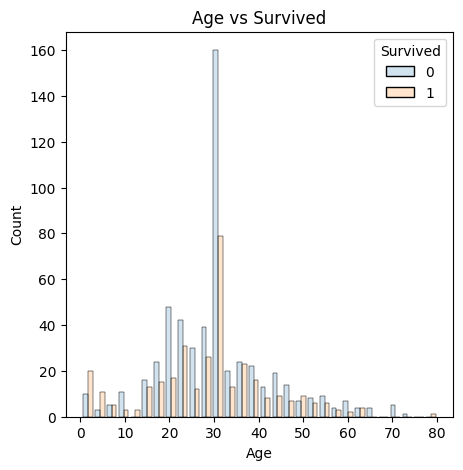

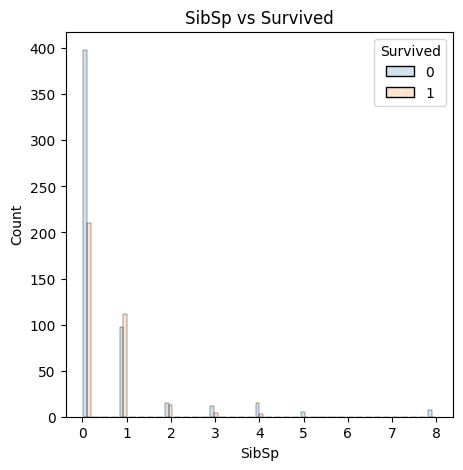

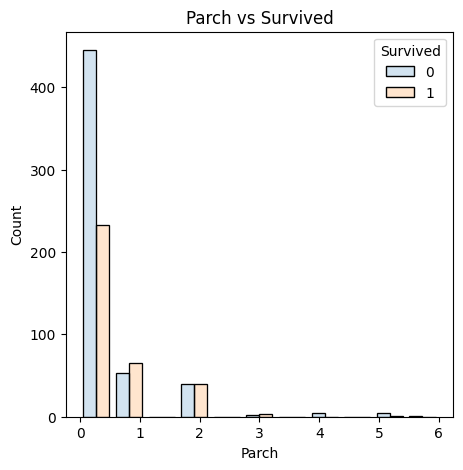

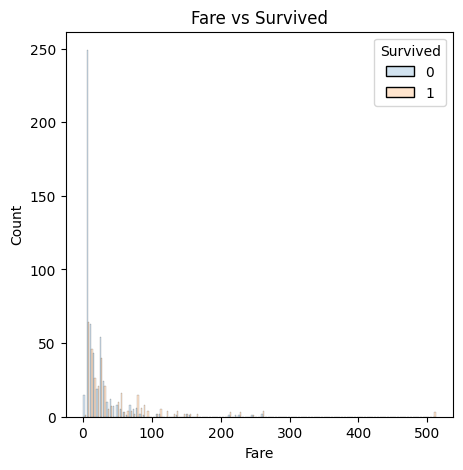

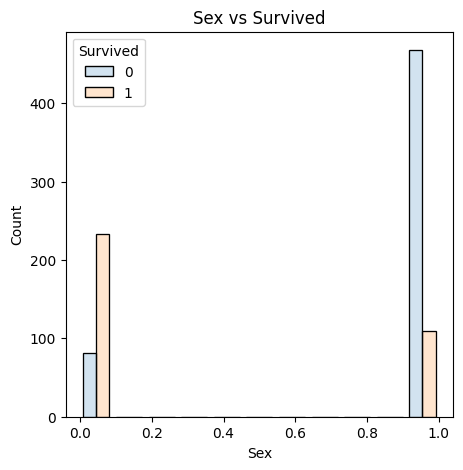

In [58]:
### EDA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check correlation between the columns
plt.figure(figsize=(5, 5))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title(f'Correlation Matrix')
plt.show()

# Check the correlation between the feature and the target variable
feature_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare","Sex"]
for column in feature_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=column, hue="Survived", data=train_df, alpha=0.2, multiple='dodge', shrink=0.8)
    plt.title(f'{column} vs Survived')
    plt.show()


In [59]:
### data preprocessing
# Usually will split the data with train_test_split but for this case we will not
X_train = train_df[['Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Pclass']]
y_train = train_df['Survived']
X_test = test_df[['Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Pclass']]
y_test = test_df['Survived']

# Normalizing the data for fares 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
#Model generation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_name = []
acc_score = []
for model in [LogisticRegression, KNeighborsClassifier, RandomForestClassifier, DecisionTreeClassifier, GradientBoostingClassifier]:
    model = model()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {model.__class__.__name__} || Accuracy: {accuracy_score(y_pred, y_test)}")
    acc_score.append(accuracy_score(y_pred, y_test))
    model_name.append(model.__class__.__name__)
model_dict = dict(zip(model_name, acc_score))
max_accuracy_model = max(model_dict, key=model_dict.get)
max_accuracy = model_dict[max_accuracy_model]
print()
print(f"Best Model: {max_accuracy_model} || Accuracy: {max_accuracy}")


Model: LogisticRegression || Accuracy: 0.9473684210526315
Model: KNeighborsClassifier || Accuracy: 0.8253588516746412
Model: RandomForestClassifier || Accuracy: 0.8133971291866029
Model: DecisionTreeClassifier || Accuracy: 0.7894736842105263
Model: GradientBoostingClassifier || Accuracy: 0.8732057416267942

Best Model: LogisticRegression || Accuracy: 0.9473684210526315
